<a href="https://colab.research.google.com/github/zaidhamad139/Prediction-of-Product-Sales/blob/main/project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
sales_predictions = '/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(sales_predictions)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
print(df.shape)

(8523, 12)


In [ ]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
if df['Item_Weight'].isna().sum() > 0:
  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
for col in ['Outlet_Size']:
  mode = df[col].mode()[0]
  df[col].fillna(mode, inplace=True)


<ipython-input-8-194742605>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
<ipython-input-8-194742605>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
if 'Item_Fat_Content' in df.columns:
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [ ]:
print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

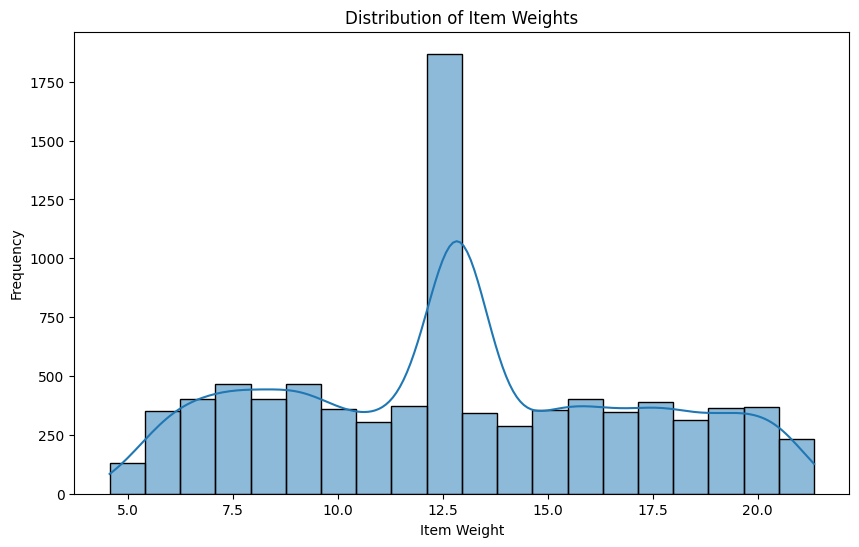

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Weight'], bins=20, kde=True)
plt.title('Distribution of Item Weights')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

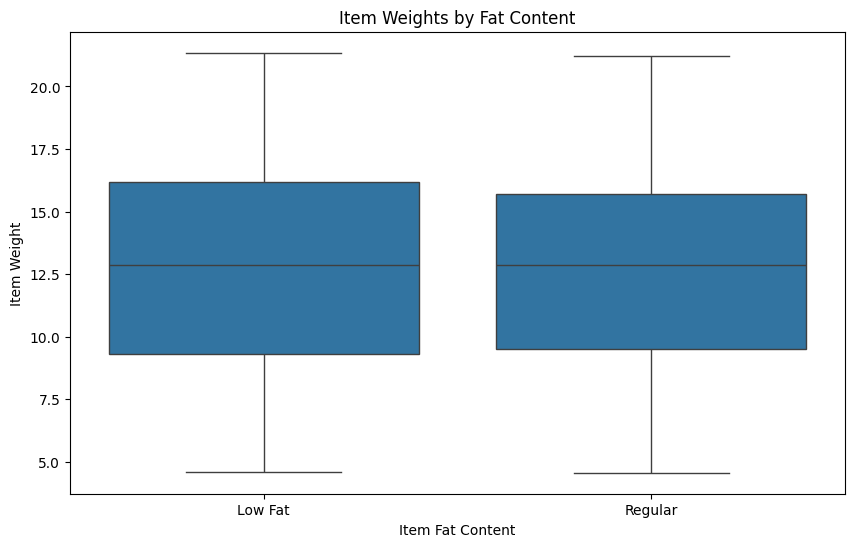

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
plt.title('Item Weights by Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Weight')
plt.show()

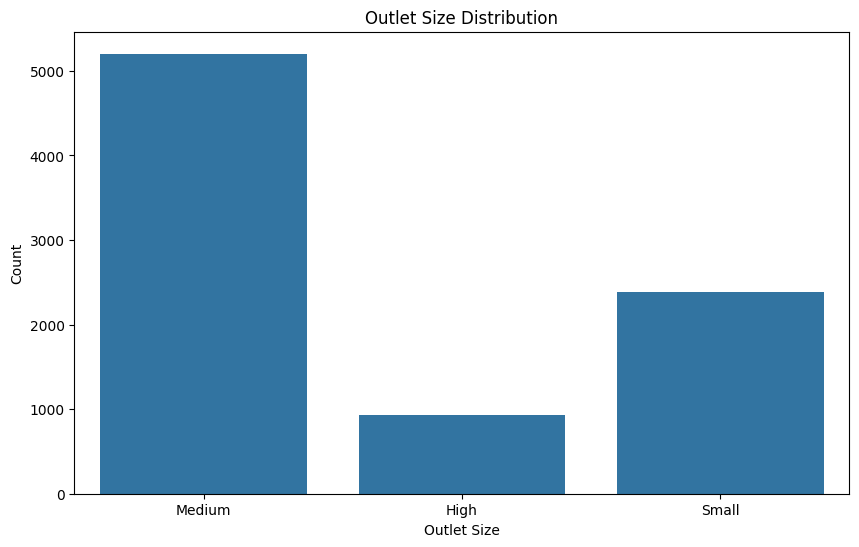

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Size', data=df)
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

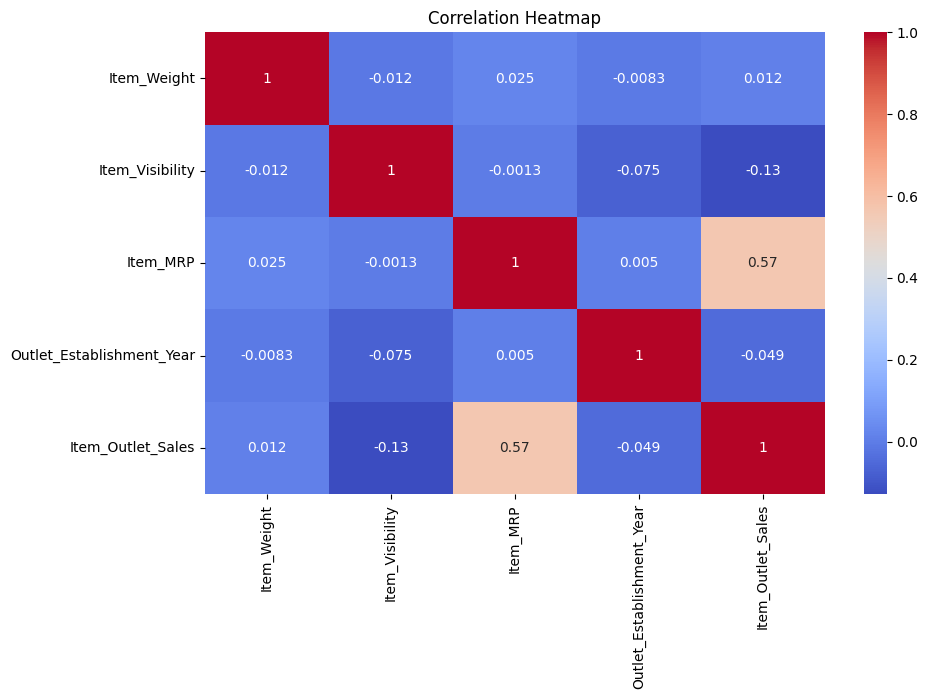

In [ ]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

it explores sales data to uncover trend and relationships using exploratory data analysis techniques

the histogram shows that most sales values are concentrated below $500 , suggedting a skewed distribution

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  """MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

<ipython-input-17-782691642>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


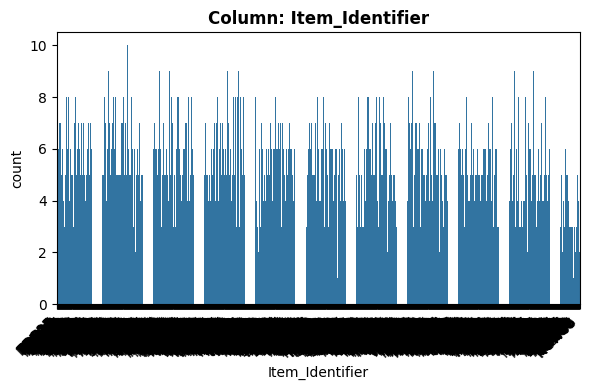

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)
it is numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
no null values

Is the feature constant or quasi-constant?
not constant or quasi- costant

What is the cardinality? Is it high (>10)?
low
Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?

<ipython-input-17-782691642>:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


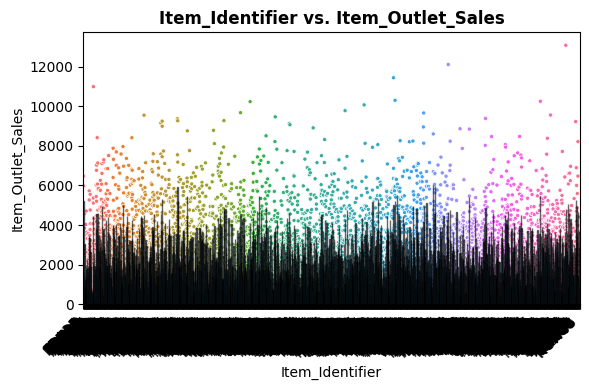

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

In [ ]:

feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

<ipython-input-17-782691642>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


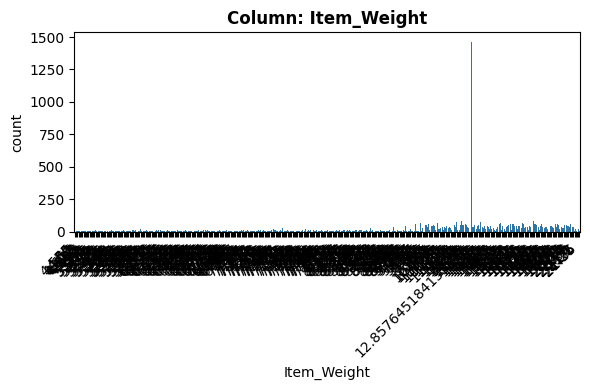

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '12.857645184135976' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,feature);

<ipython-input-17-782691642>:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


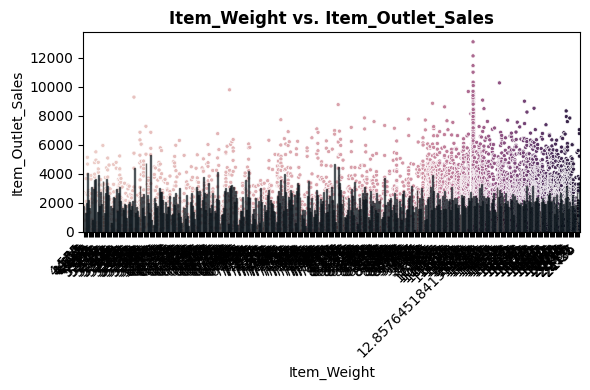

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

In [ ]:

feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

<ipython-input-17-782691642>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


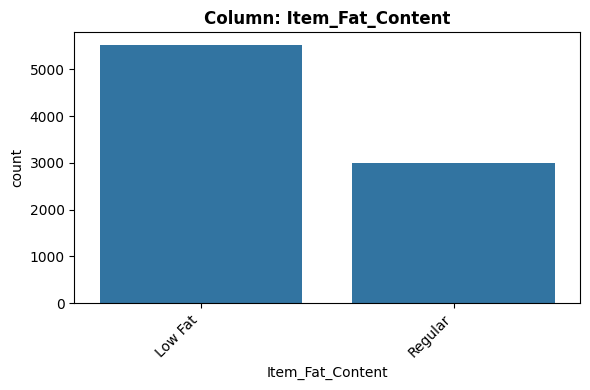

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,feature);

<ipython-input-17-782691642>:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


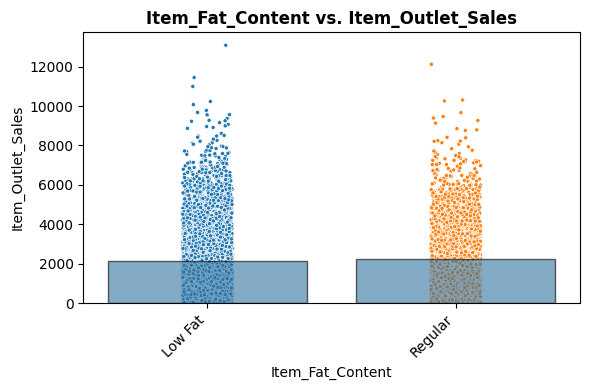

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

In [ ]:

feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

<ipython-input-17-782691642>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


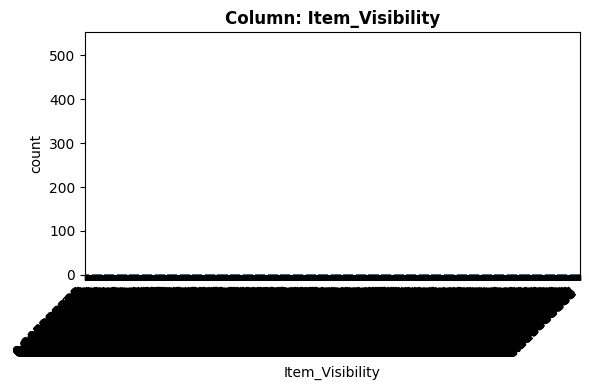

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,feature);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

num_cols = X_train.select_dtypes('number').columns
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

numeric_pipe = make_pipeline(impute_median, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_cols = X_train.select_dtypes('object').columns # Assuming all object type columns are ordinal for now, this can be adjusted.
impute_missing = SimpleImputer(strategy='constant', fill_value='Missing') # Impute missing values with 'Missing'
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Handle unknown values

ord_pipe = make_pipeline(impute_missing, ordinal_encoder)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [ ]:
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Missing', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1))]),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

cat_cols = X_train.select_dtypes('object').drop(ord_cols, axis=1).columns
impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index([], dtype='object'))

In [ ]:
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],verbose_feature_names_out=True)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ord...
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index([], dtype='object'))])

In [ ]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ord...
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index([], dtype='object'))])

In [ ]:
col_transformer.fit(X_train)
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
print(X_train_processed.head())

      numeric__Item_Weight  numeric__Item_Visibility  numeric__Item_MRP  \
4776              0.819164                 -0.712775           1.828109   
7510              0.558258                 -1.291052           0.603369   
5828             -0.129588                  1.813319           0.244541   
5327             -1.167286                 -1.004931          -0.952591   
4810              1.530729                 -0.965484          -0.336460   

      numeric__Outlet_Establishment_Year  ordinal__Item_Identifier  \
4776                            1.327849                    1316.0   
7510                            1.327849                    1056.0   
5828                            0.136187                     629.0   
5327                            0.732018                     404.0   
4810                            0.493686                     278.0   

      ordinal__Item_Fat_Content  ordinal__Item_Type  \
4776                        0.0                 9.0   
7510              

In [ ]:
print(X_test_processed[:5])

      numeric__Item_Weight  numeric__Item_Visibility  numeric__Item_MRP  \
7503              0.332929                 -0.776646          -0.998816   
2957             -1.177959                  0.100317          -1.585194   
7031              0.380366                 -0.482994          -1.595784   
1084             -0.009180                 -0.415440           0.506592   
856              -0.640728                 -1.047426           0.886725   

      numeric__Outlet_Establishment_Year  ordinal__Item_Identifier  \
7503                           -1.293807                     484.0   
2957                           -0.102145                    1384.0   
7031                            0.136187                     243.0   
1084                           -1.532139                      13.0   
856                             0.732018                     884.0   

      ordinal__Item_Fat_Content  ordinal__Item_Type  \
7503                        0.0                 5.0   
2957              

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [ ]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
lin_reg.intercept_.round(2)

np.float64(1458.53)

In [ ]:
lin_reg.coef_.round(2)

array([-1.0300e+01, -7.8410e+01,  9.8137e+02, -4.6600e+00,  2.0000e-02,
        8.0860e+01,  1.0000e-01,  6.3940e+01, -3.5453e+02, -2.0819e+02,
        8.6899e+02])

In [ ]:
feature_names = col_transformer.get_feature_names_out()
feature_names

array(['numeric__Item_Weight', 'numeric__Item_Visibility',
       'numeric__Item_MRP', 'numeric__Outlet_Establishment_Year',
       'ordinal__Item_Identifier', 'ordinal__Item_Fat_Content',
       'ordinal__Item_Type', 'ordinal__Outlet_Identifier',
       'ordinal__Outlet_Size', 'ordinal__Outlet_Location_Type',
       'ordinal__Outlet_Type'], dtype=object)

In [ ]:
import pandas as pd
coeffs = pd.Series(lin_reg.coef_.round(2), index = X_train_processed.columns)
coeffs

,0
numeric__Item_Weight,-10.30
numeric__Item_Visibility,-78.41
numeric__Item_MRP,981.37
numeric__Outlet_Establishment_Year,-4.66
ordinal__Item_Identifier,0.02
ordinal__Item_Fat_Content,80.86
ordinal__Item_Type,0.10
ordinal__Outlet_Identifier,63.94
ordinal__Outlet_Size,-354.53
ordinal__Outlet_Location_Type,-208.19


In [ ]:
X_test_processed.head(1)

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Identifier,ordinal__Item_Fat_Content,ordinal__Item_Type,ordinal__Outlet_Identifier,ordinal__Outlet_Size,ordinal__Outlet_Location_Type,ordinal__Outlet_Type
7503,0.332929,-0.776646,-0.998816,-1.293807,484.0,0.0,5.0,1.0,0.0,2.0,1.0


In [ ]:
y_predictions_train = lin_reg.predict(X_train_processed)
y_predictions_test = lin_reg.predict(X_test_processed)

In [ ]:
prediction_df = X_test_processed.copy()
prediction_df['actual_price'] = y_test
prediction_df['predicted_price'] = y_predictions_test.round(1)
prediction_df['difference'] = (y_predictions_test - y_test).round(1)
prediction_df.head(10)

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Identifier,ordinal__Item_Fat_Content,ordinal__Item_Type,ordinal__Outlet_Identifier,ordinal__Outlet_Size,ordinal__Outlet_Location_Type,ordinal__Outlet_Type,actual_price,predicted_price,difference
7503,0.332929,-0.776646,-0.998816,-1.293807,484.0,0.0,5.0,1.0,0.0,2.0,1.0,1743.0644,1069.4,-673.7
2957,-1.177959,0.100317,-1.585194,-0.102145,1384.0,0.0,8.0,8.0,2.0,0.0,1.0,356.8688,610.0,253.1
7031,0.380366,-0.482994,-1.595784,0.136187,243.0,1.0,3.0,9.0,1.0,0.0,1.0,377.5086,1102.2,724.7
1084,-0.009180,-0.415440,0.506592,-1.532139,13.0,1.0,14.0,5.0,1.0,2.0,3.0,5778.4782,4233.8,-1544.7
856,-0.640728,-1.047426,0.886725,0.732018,884.0,1.0,10.0,6.0,2.0,1.0,1.0,2356.9320,2850.5,493.6
4304,-0.805574,-0.470511,-1.748367,0.136187,103.0,0.0,14.0,9.0,1.0,0.0,1.0,865.5400,880.8,15.3
2132,-0.009180,1.189692,1.070615,-1.532139,702.0,0.0,3.0,5.0,1.0,2.0,3.0,4613.9940,4594.5,-19.5
1385,-0.568386,-1.025995,0.000559,1.327849,232.0,1.0,13.0,3.0,1.0,2.0,2.0,2410.8618,2785.3,374.4
5239,0.261772,-0.824923,-0.620321,1.327849,1198.0,0.0,0.0,3.0,1.0,2.0,2.0,1948.1308,2090.6,142.4
6516,-1.040390,-0.974654,0.801084,1.327849,1437.0,0.0,9.0,3.0,1.0,2.0,2.0,1937.4780,3516.7,1579.2


In [ ]:
from sklearn.pipeline import make_pipeline
linreg_pipe = make_pipeline(col_transformer, lin_reg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 908.220
- MSE = 1,451,977.027
- RMSE = 1,204.980
- R^2 = 0.509

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 866.494
- MSE = 1,349,076.783
- RMSE = 1,161.498
- R^2 = 0.511


In [ ]:
linreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('ord...
                                    Index(['Item_Identifier', 'Item_Fat_Content', 'Item

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline # Import make_pipeline

# Create a pipeline with the column transformer and BaggingRegressor
bagged_tree_pipe = make_pipeline(col_transformer, BaggingRegressor(random_state=42))

# Fit the pipeline on the training data
bagged_tree_pipe.fit(X_train, y_train)

# Evaluate the model
evaluate_regression(bagged_tree_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 320.669
- MSE = 239,745.639
- RMSE = 489.638
- R^2 = 0.919

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 787.761
- MSE = 1,302,225.189
- RMSE = 1,141.151
- R^2 = 0.528


In [ ]:
bagged_tree.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'estimator__min_samples_split': [2, 3, 4]}

In [ ]:
param_grid_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'base_estimator': [DecisionTreeRegressor(max_depth=d) for d in [None, 5, 10]]}

In [ ]:
grid_search = GridSearchCV(bagged_tree, param_grid, n_jobs = -1, verbose = 1)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


bagged_tree_pipe = make_pipeline(col_transformer, BaggingRegressor(random_state=42))


param_grid_bag = {
    'baggingregressor__n_estimators': [10, 50, 100],
    'baggingregressor__max_samples': [0.5, 0.8, 1.0],
    'baggingregressor__estimator': [DecisionTreeRegressor(max_depth=d) for d in [None, 5, 10]]
}



grid_search = GridSearchCV(bagged_tree_pipe, param_grid_bag, n_jobs = -1, verbose = 1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

best_model = grid_search.best_estimator_
print("\nBest estimator found by GridSearchCV:")
print(best_model)


print("\nEvaluating the best model:")
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found by GridSearchCV:
{'baggingregressor__estimator': DecisionTreeRegressor(max_depth=5), 'baggingregressor__max_samples': 1.0, 'baggingregressor__n_estimators': 50}

Best estimator found by GridSearchCV:
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.pipeline import make_pipeline


rf_pipe = make_pipeline(col_transformer, RandomForestRegressor(random_state=42))


rf_pipe.fit(X_train, y_train)


print("Evaluating the Random Forest model:")
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

Evaluating the Random Forest model:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 298.762
- MSE = 185,183.945
- RMSE = 430.330
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.309
- MSE = 1,227,255.233
- RMSE = 1,107.816
- R^2 = 0.555


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline


rf_pipe = make_pipeline(col_transformer, RandomForestRegressor(random_state=42))


param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__max_features': ['sqrt', 'log2']
}


grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


grid_rf.fit(X_train, y_train)


best_rf_model = grid_rf.best_estimator_


print("Best Random Forest Params:", grid_rf.best_params_)


print("\nEvaluating the Tuned Random Forest model:")
evaluate_regression(best_rf_model, X_train, y_train, X_test, y_test)

Best Random Forest Params: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 100}

Evaluating the Tuned Random Forest model:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 668.270
- MSE = 883,352.343
- RMSE = 939.868
- R^2 = 0.702

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.326
- MSE = 1,107,250.962
- RMSE = 1,052.260
- R^2 = 0.599


Recommended Model: Tuned Random Forest

It balances bias and variance well.

Less overfitting than the default RF and better generalization than linear regression.

Handles non-linear relationships better than linear regression.

Our model explains approximately 60% of the variation in sales on new, unseen data. This means the model captures most of the important trends in the data while remaining general enough to make accurate predictions in real business environments.

We used a metric called RMSE (Root Mean Squared Error) to understand prediction error. Our model has an RMSE of 1,052 sales units, meaning that, on average, its predictions are within that margin of actual sales.

We selected RMSE because it penalizes large mistakes more than small ones, which is important when sales errors can mean big financial consequences. While not perfect, the model offers a reasonable trade-off between accuracy and reliability.

Training R²: 0.702
Test R²: 0.599

There is a moderate drop in performance between training and test sets, which is expected. However, the drop is not dramatic, indicating the model generalizes well and is not severely overfit.

